In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Carregando o dataset
df = pd.read_csv('pima-data.csv')

In [3]:
#Verificando o formato dos dados
df.shape

(768, 10)

In [4]:
#Verificando as primeiras linhas
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [5]:
#Verificando as ultimas linhas
df.tail(5)


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
#Verificando se existem valores nulos
df.isnull().values.any()

False

In [7]:
df.isnull().sum()

num_preg        0
glucose_conc    0
diastolic_bp    0
thickness       0
insulin         0
bmi             0
diab_pred       0
age             0
skin            0
diabetes        0
dtype: int64

In [8]:
#Identificando a correlação entre as variáveis
def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

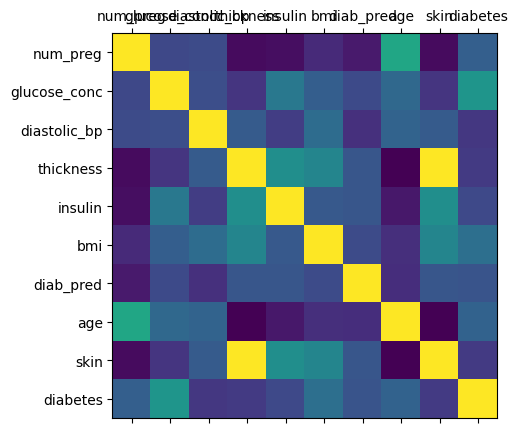

In [9]:
plot_corr(df, size=5)

In [10]:
#Definindo as classes
diabetes_map = {True : 1, False : 0}

In [11]:
#Aplicando o mapeamento ao dataset
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [12]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3780,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [13]:
# Verificando como os dados estão distribuídos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Número de Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Número de Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))

Número de Casos Verdadeiros: 268 (34.90%)
Número de Casos Falsos     : 500 (65.10%)


In [14]:
import sklearn as sk
from sklearn.model_selection import train_test_split

C:\Users\victo\miniconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [17]:
#Seleção de variáveis preditoras(Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

In [18]:
#Variável Target
atrib_prev = ['diabetes']

In [26]:
#Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

In [28]:
#Definindo taxa de split
split_test_size = 0.30

In [29]:
#Criando dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state= 42)

In [30]:
#Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [31]:
#Verificando o split
print("Original True : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), 
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), 
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Training True : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]), 
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Training False : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]), 
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Test True : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]), 
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Test False : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]), 
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Test True : 80 (34.63%)
Test False : 151 (65.37%)


In [34]:
#Mostrando colunas com valores zerados
print(len(df.loc[df['glucose_conc'] == 0])) 
print(len(df.loc[df['diastolic_bp'] == 0]))
print(len(df.loc[df['thickness'] == 0]))
print(len(df.loc[df['insulin'] == 0]))
print(len(df.loc[df['bmi'] == 0]))
print(len(df.loc[df['age'] == 0]))

5
35
227
374
11
0


In [40]:

from sklearn.impute import SimpleImputer

In [44]:
#Criando objeto
preencheZero = SimpleImputer(missing_values= 0)

#Substituindo os valores iguais a zero, pela média dos dados
X_treino = preencheZero.fit_transform(X_treino)
X_teste = preencheZero.fit_transform(X_teste)

In [45]:
#Utilizando classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [46]:
modelo_v1 = GaussianNB()

In [47]:
#Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB()

In [48]:
#Verificando a exatidão no modelo nos dados de treino
from sklearn import metrics

In [53]:
nb_predict_train = modelo_v1.predict(X_treino)
print("Exatidão(Accuracy): {0:4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))

Exatidão(Accuracy): 0.754190


In [54]:
nb_predict_test = modelo_v1.predict(X_teste)
print("Exatidão(Accuracy): {0:4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))

Exatidão(Accuracy): 0.735931


In [58]:
#Criando uma matriz de confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels= [1, 0])))

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels= [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 33 118]]
Classification Report
              precision    recall  f1-score   support

           1       0.61      0.65      0.63        80
           0       0.81      0.78      0.79       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Otimizando o modelo com RandomForest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
modelo_v2 = RandomForestClassifier(random_state=42)
modelo_v2.fit(X_treino, Y_treino.ravel())

RandomForestClassifier(random_state=42)

In [66]:
#Verificando os dados de treino
rf_predict_train = modelo_v2.predict(X_treino)
print("Accuracy: {0:4f}".format(metrics.accuracy_score(Y_treino, rf_predict_train)))

Accuracy: 1.000000


In [70]:
#Verificando os dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
print("Accuracy: {0:4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))

Accuracy: 0.740260


In [71]:
#Criando uma matriz de confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels= [1, 0])))

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels= [1, 0]))

Confusion Matrix
[[ 52  28]
 [ 32 119]]
Classification Report
              precision    recall  f1-score   support

           1       0.62      0.65      0.63        80
           0       0.81      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.72      0.72       231
weighted avg       0.74      0.74      0.74       231



## Regressão Logistica

In [72]:
from sklearn.linear_model import LogisticRegression

In [75]:
#Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state= 42, max_iter = 1000)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

In [76]:
#Verificando os dados de teste
print("Accuracy: {0:4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))

print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels= [1, 0]))

Accuracy: 0.735931
Classification Report
              precision    recall  f1-score   support

           1       0.63      0.59      0.61        80
           0       0.79      0.81      0.80       151

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.73      0.74      0.73       231



## Fazendo previsões com o modelo treinado

In [77]:
import pickle

In [78]:
#Salvando o modelo para usar mais tarde
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [79]:
X_teste

array([[6.00000000e+00, 9.80000000e+01, 5.80000000e+01, ...,
        3.40000000e+01, 4.30000000e-01, 4.30000000e+01],
       [2.00000000e+00, 1.12000000e+02, 7.50000000e+01, ...,
        3.57000000e+01, 1.48000000e-01, 2.10000000e+01],
       [2.00000000e+00, 1.08000000e+02, 6.40000000e+01, ...,
        3.08000000e+01, 1.58000000e-01, 2.10000000e+01],
       ...,
       [4.85714286e+00, 1.27000000e+02, 8.00000000e+01, ...,
        3.63000000e+01, 8.04000000e-01, 2.30000000e+01],
       [6.00000000e+00, 1.05000000e+02, 7.00000000e+01, ...,
        3.08000000e+01, 1.22000000e-01, 3.70000000e+01],
       [5.00000000e+00, 7.70000000e+01, 8.20000000e+01, ...,
        3.58000000e+01, 1.56000000e-01, 3.50000000e+01]])

In [80]:
# Carregando o modelo e fazendo previsão com novos conjuntos de dados 
# (X_teste, Y_teste devem ser novos conjuntos de dados preparados com o procedimento de limpeza e transformação adequados)
loaded_model = pickle.load(open(filename, 'rb'))
resultado1 = loaded_model.predict(X_teste[15].reshape(1, -1))
resultado2 = loaded_model.predict(X_teste[18].reshape(1, -1))
print(resultado1)
print(resultado2)

[0]
[1]
